<a href="https://colab.research.google.com/github/ricyoung/cs689/blob/master/HW3_super_simple_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from : https://github.com/mcminnra/notebooks/blob/110c2c5c4ba85bb0a23eb8018da6f8147ebc65b8/primers/linear_regression.ipynb


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def mean_squared_error(features, target, weights):
    """Computes Mean Squared Error for Linear Regression

    Args:
        features: numpy array of predictor values
        target: numpy array of response values
        weights: weights to estimate target 

    Returns:
        Mean Squared Error

    """
    N = len(features)
    loss = target - np.dot(features, weights)
    mse = (1/(2*N)) * np.sum(loss ** 2)
    
    return mse

In [0]:
def linear_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.vstack(np.ones((features.shape[0])))
        features = np.hstack((intercept, features))
        
    weights = np.zeros([features.shape[1]])
    m = features.shape[0]  # number of training examples
    
    for step in range(num_steps):
        # Update weights with gradient
        error = target - np.dot(features, weights)
        gradient = (-1/m) * np.dot(features.T, error)
        weights -= learning_rate * gradient
        
        # Print error every so often
        if step % 10000 == 0:
            print("Step {0} - MSE: {1:.5f}".format(step, mean_squared_error(features, target, weights)))
        
    return weights

In [0]:
np.random.seed(16)
num_observations = 500

data = np.random.multivariate_normal([0, 0], [[1, .9],[.9, 1]], num_observations)
x = np.vstack(data[:, 0])
y = data[:, 1]

# Add intercept to data
intercept = np.vstack(np.ones((x.shape[0])))
x_int = np.hstack((intercept, x))

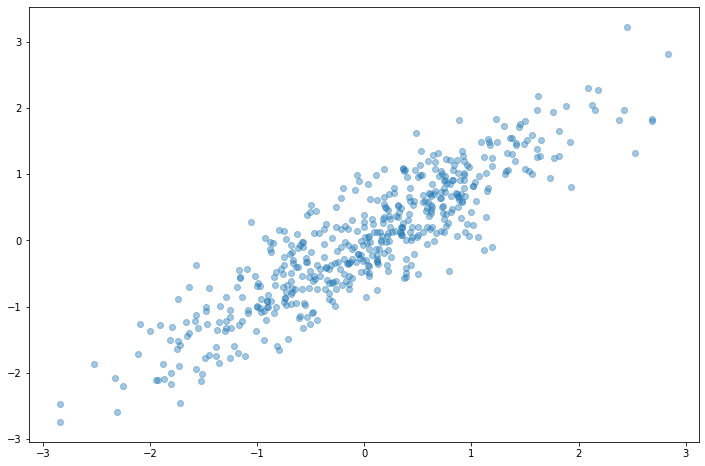

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, alpha = .4)

In [0]:
weights = linear_regression(x, y, num_steps = 200000, learning_rate = .00003, add_intercept=True)

Step 0 - MSE: 0.47489
Step 10000 - MSE: 0.30920
Step 20000 - MSE: 0.21585
Step 30000 - MSE: 0.16325
Step 40000 - MSE: 0.13360
Step 50000 - MSE: 0.11690
Step 60000 - MSE: 0.10748
Step 70000 - MSE: 0.10217
Step 80000 - MSE: 0.09917
Step 90000 - MSE: 0.09748
Step 100000 - MSE: 0.09653
Step 110000 - MSE: 0.09599
Step 120000 - MSE: 0.09569
Step 130000 - MSE: 0.09552
Step 140000 - MSE: 0.09542
Step 150000 - MSE: 0.09537
Step 160000 - MSE: 0.09534
Step 170000 - MSE: 0.09532
Step 180000 - MSE: 0.09531
Step 190000 - MSE: 0.09530


In [0]:
print(mean_squared_error(x_int, y, weights))

0.09530123714360891


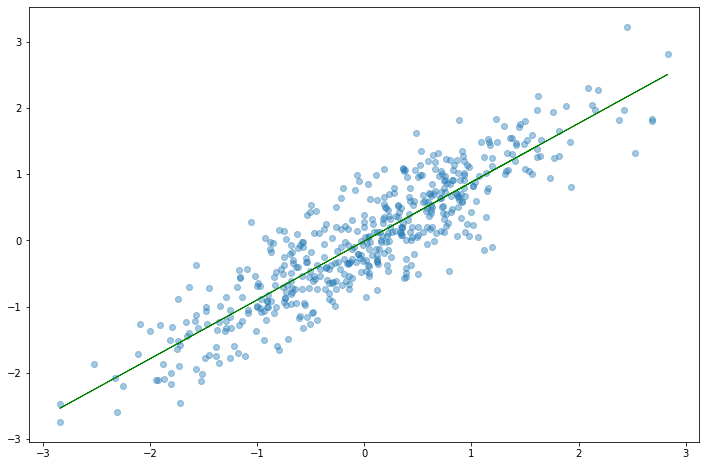

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, alpha = .4)
plt.plot(x, np.dot(x_int, weights), color='g', linestyle='-', lw = 1)


In [0]:
print("y = {0:.4f} + {1:.4f}x".format(weights[0], weights[1]))

y = -0.0100 + 0.8884x
